# single_color_image
Open image, do FFT, and display original and result.

In [1]:
def gray_from_rgb(im_rgb):
    im_gray = []
    for row in im_rgb:
        col = []
        for ele in row:
            r = ele[0]
            g = ele[1]
            b = ele[2]
            gray = 0.2989 * r + 0.5870 * g + 0.1140 * b 
            col.append(gray)
        im_gray.append(col)
    return im_gray

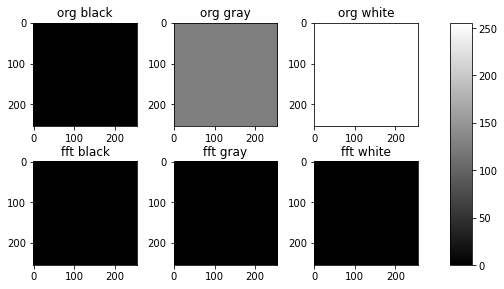

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
imb = plt.imread("data/black_255x255.png").astype(float)
img = plt.imread("data/gray_255x255.png").astype(float)
imw = plt.imread("data/white_255x255.png").astype(float)

imb_gray = gray_from_rgb(imb)
img_gray = gray_from_rgb(img)
imw_gray = gray_from_rgb(imw)

from scipy import fftpack
imb_fft = np.abs(fftpack.fft2(imb_gray)).astype("uint8")
img_fft = np.abs(fftpack.fft2(img_gray)).astype("uint8")
imw_fft = np.abs(fftpack.fft2(imw_gray)).astype("uint8")

fig, axarr = plt.subplots(2,3)

im = axarr[0, 0].imshow(imb, plt.cm.gray, vmin=0, vmax=255)
axarr[0, 0].set_title("org black")
axarr[0, 1].imshow(img, plt.cm.gray, vmin=0, vmax=255)
axarr[0, 1].set_title("org gray")
axarr[0, 2].imshow(imw, plt.cm.gray, vmin=0, vmax=255)
axarr[0, 2].set_title("org white")

axarr[1, 0].imshow(np.abs(imb_fft), plt.cm.gray)
axarr[1, 0].set_title("fft black")
axarr[1, 1].imshow(np.abs(img_fft), plt.cm.gray)
axarr[1, 1].set_title("fft gray")
axarr[1, 2].imshow(np.abs(imw_fft), plt.cm.gray)
axarr[1, 2].set_title("fft white")

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([1.05, 0.08, 0.05, 0.84])
fig.colorbar(im, cax=cbar_ax)

fig.tight_layout()
plt.show()

## refs
1. "Plotting images side by side using matplotlib", url https://stackoverflow.com/a/41793987/9475509 [20230205].
2. "How to add title to each subplot", url https://stackoverflow.com/a/70864018/9475509 [20230205].
3. "Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers)", url https://stackoverflow.com/a/74090710/9475509 [20230205].
4. "How to have one colorbar for all subplots", url https://stackoverflow.com/a/13784887/9475509 [20230205].
5. "Hide all warnings in IPython", url https://stackoverflow.com/a/9031848/9475509 [20230205].
6. "Use Numpy to convert rgb pixel array into grayscale [duplicate]", url https://stackoverflow.com/a/41971823/9475509 [20230206].